<H1>A study into the cost of travelling on public transport for students in Singapore</H1>
<H2>Goal: To understand differences in travel cost for each student group in Singapore and to consider other factors that may play a role in a student's choice of public transport.</H2>
<p>With two case studies: a student attending SIM university, Nathanael, and a student attending Anderson Serangoon Junior College, Caleb.</p>

<H3>Aims and objectives</H3>
<p>1) Examine varying fares for students against the distance they travel.</p>
<p>2) Hypothesize a student's preference and check it based on travel cost. </p>
<p>3) With reference to the two case studies, make assumptions on what a student would choose.</p>
<p>4) From the case study, compare the cost of travel between the assumption and the actual decision.</p>
<p>5) Explain the possible other factors that may have resulted in the difference between what was hypothesized and the case study</p>
<H3>Definitions</H3>
<p>1) Student refers to travellers who own any valid card mentioned here and are still studying: 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i) Undergraduate Concession Card, and Private Education Institution Student Concession card
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii) Diploma Student Concession Card, School Smartcard/Non-MOE School Smartcard, and Institute of Technical Education Student Concession Card
</p>

<p>2) Students who belong to group i have to pay adult fare for travelling, only group ii is eligible for student fare</p>

<p>3) Public transport refers to MRT, LRT, or bus, and service providers all have the same fare structure.</p>

<p>4) Monthly Concession Passes are available for students, consisting of three separate types: Bus Concession Pass (BCP), Train Concession Pass (TCP), Hybrid Concession Pass* (HCP), however the pricing is different for group i and ii.
<br><i>*for both train and basic bus services</i>
</p>
<p>In order for us to research further into the topic, we need to collect data on travel fares. This can be done through web scraping.</p>

<H2>Step 1: Collecting and Cleaning Data</H2>

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#headers of the columns
stuD = {
    "0": "Distance over(km)",
    "1":"MRT/LRT(before 7.45am on weekdays), Card",
    "2":"LRT/MRT/Bus, Card",
    "3":"Express Services, Card",
    "4":"Bus, Cash",
    "5":"MRT/LRT, Cash",
    "6":"Express Services, Cash"}
aduD = {
    "Unnamed: 0.1.1": "Distance over(km)",
    "Card Fare": "Bus, Card",
    "Card Fare.1": "MRT/LRT(before 7.45am on weekdays), Card",
    "Card Fare.2": "LRT/MRT, Card",
    "Card Fare.3": "Express Services, Card",
    "Cash Fare Per Ride": "Bus, Cash",
    "Cash Fare Per Ride.1": "MRT/LRT, Cash",
    "Cash Fare Per Ride.2": "Express Services, Cash"}

In [3]:
#functions
def cleanerFn(messCsv, cleanCsv, dict):
    mess = pd.read_csv(messCsv)
    clean = mess.drop([0,1,2], axis = 0)
    clean.drop(["Unnamed: 0"], axis = 1, inplace=True)

    clean.rename(columns=dict, inplace = True)
    clean.to_csv(cleanCsv)
    fare = pd.read_csv(cleanCsv)
    fare.drop(["Unnamed: 0"], axis = 1, inplace=True)
    return fare

def scrub(fare):
    for x in fare.index:
        for y in fare.columns:
            temp = str(fare.loc[x,y])
            temp = temp.replace('$', '')
            fare.loc[x,y] = float(temp)

In [4]:
#collect the data from the URL using Pandas
url = 'https://www.sbstransit.com.sg/fares-and-concessions'
df = pd.read_html(url)
df[0].to_csv('aduFareMessy.csv')
df[4].to_csv('stuFareMessy.csv')

<H3>Student Fares</H3>

In [5]:
#clean the student fare data
stuFare = cleanerFn('stuFareMessy.csv', 'stuFare.csv', stuD)
for x in stuFare.index:
    if(x == 0):
        stuFare.loc[x, "Distance over(km)"] = 0.0
    elif(0 < x < 8):
        stuFare.loc[x, "Distance over(km)"] = 3.2 + (x-1)*1
    elif(x == 8):
        stuFare.loc[x, "Distance over(km)"] = 3.2 + x*1
    elif(7 < x):
        stuFare.loc[x, "Distance over(km)"] = 3.2 + 8 + (x-8)*4
scrub(stuFare)
display(stuFare)

,Distance over(km),"MRT/LRT(before 7.45am on weekdays), Card","LRT/MRT/Bus, Card","Express Services, Card","Bus, Cash","MRT/LRT, Cash","Express Services, Cash"
0,0.0,0.0,0.42,0.72,0.85,1.7,2.5
1,3.2,0.0,0.47,0.77,0.85,1.9,2.5
2,4.2,0.02,0.52,0.82,0.85,1.9,2.5
3,5.2,0.07,0.57,0.87,0.85,1.9,2.5
4,6.2,0.1,0.6,0.9,1.05,2.1,2.5
5,7.2,0.13,0.63,0.93,1.05,2.1,2.5
6,8.2,0.13,0.63,0.93,1.05,2.1,2.65
7,9.2,0.13,0.63,0.93,1.05,2.3,2.65
8,11.2,0.13,0.63,0.93,1.05,2.5,2.8
9,15.2,0.13,0.63,0.93,1.05,2.6,2.95


<H3>Adult Fares</H3>

In [6]:
#clean adult fare data
messy = pd.read_csv('aduFareMessy.csv')
cleany = messy.drop([0,1], axis = 0)
cleany.to_csv('aduFare.csv')
aduFare = pd.read_csv('aduFare.csv')
aduFare.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1, inplace=True)
aduFare.rename(columns=aduD, inplace = True)
for x in aduFare.index:
    if(x==0):
        aduFare.loc[x,"Distance over(km)"] = 0.0
    else:
        aduFare.loc[x,"Distance over(km)"] = 3.2 + (x-1)*1
scrub(aduFare)
display(aduFare)

,Distance over(km),"Bus, Card","MRT/LRT(before 7.45am on weekdays), Card","LRT/MRT, Card","Express Services, Card","Bus, Cash","MRT/LRT, Cash","Express Services, Cash"
0,0.0,0.92,0.42,0.92,1.52,1.7,1.7,2.5
1,3.2,1.02,0.52,1.02,1.62,1.9,1.9,2.5
2,4.2,1.12,0.62,1.12,1.72,1.9,1.9,2.5
3,5.2,1.22,0.72,1.22,1.82,1.9,1.9,2.5
4,6.2,1.31,0.81,1.31,1.91,2.1,2.1,2.5
5,7.2,1.38,0.88,1.38,1.98,2.1,2.1,2.5
6,8.2,1.44,0.94,1.44,2.04,2.1,2.1,2.65
7,9.2,1.48,0.98,1.48,2.08,2.3,2.3,2.65
8,10.2,1.52,1.02,1.52,2.12,2.3,2.3,2.65
9,11.2,1.56,1.06,1.56,2.16,2.5,2.5,2.8


<H2>Step 2: Plot the graphs for early comparison and hypothesis</H2>

<H3>Creating arrays and filling them to plot graphs</H3>

In [7]:
#creating storage arrays to plot data later
#distance
aDist = []
sDist = []

#all are in order to the headers of table e.g aPxB47: 'MRT/LRT(before 7.45am on weekdays), Card'
#card
    #adult
aPxBus = []
aPxB47 = []
aPxRail = []
aPxExp = []
    #student
sPxB47 = []
sPxAll = []
sPxExp = []

#cash
    #adult
aCPxBus = []
aCPxRail = []
aCPxExp = []
    #student
sCPxBus = []
sCPxRail = []
sCPxExp = []

In [8]:
#fill the arrays
for x in aduFare.index:
    aDist.append(aduFare.loc[x,"Distance over(km)"])
    aPxB47.append(aduFare.loc[x,"MRT/LRT(before 7.45am on weekdays), Card"])
    aPxBus.append(aduFare.loc[x,"Bus, Card"])
    aPxRail.append(aduFare.loc[x,"LRT/MRT, Card"])
    aPxExp.append(aduFare.loc[x,"Express Services, Card"])
    aCPxBus.append(aduFare.loc[x,"Bus, Cash"])
    aCPxRail.append(aduFare.loc[x,"MRT/LRT, Cash"])
    aCPxExp.append(aduFare.loc[x,"Express Services, Cash"])

    #for students, price will plateau at 23.2km.
    #however, adult fare distance goes up to 40.2km, which means we need to add a data point
for x in stuFare.index:
    sDist.append(stuFare.loc[x,"Distance over(km)"])
    sPxB47.append(stuFare.loc[x,"MRT/LRT(before 7.45am on weekdays), Card"])
    sPxAll.append(stuFare.loc[x,"LRT/MRT/Bus, Card"])
    sPxExp.append(stuFare.loc[x,"Express Services, Card"])
    sCPxBus.append(stuFare.loc[x,"Bus, Cash"])
    sCPxRail.append(stuFare.loc[x,"MRT/LRT, Cash"])
    sCPxExp.append(stuFare.loc[x,"Express Services, Cash"])
    
#new data point at 40.2km
sDist.append(40.2)
sPxB47.append(stuFare.loc[11,"MRT/LRT(before 7.45am on weekdays), Card"])
sPxAll.append(stuFare.loc[11,"LRT/MRT/Bus, Card"])
sPxExp.append(stuFare.loc[11,"Express Services, Card"])
sCPxBus.append(stuFare.loc[11,"Bus, Cash"])
sCPxRail.append(stuFare.loc[11,"MRT/LRT, Cash"])
sCPxExp.append(stuFare.loc[11,"Express Services, Cash"])

<H3>Plotting the graphs of the fares for MRT/LRT and also the fares for buses,
<br><i>including express service which only runs at set timings
    <br>(e.g. 151e runs on weekdays, 07:00am – 07:30am and 5:50pm – 6:20pm)</i>
</H3>


<Figure size 432x288 with 0 Axes>

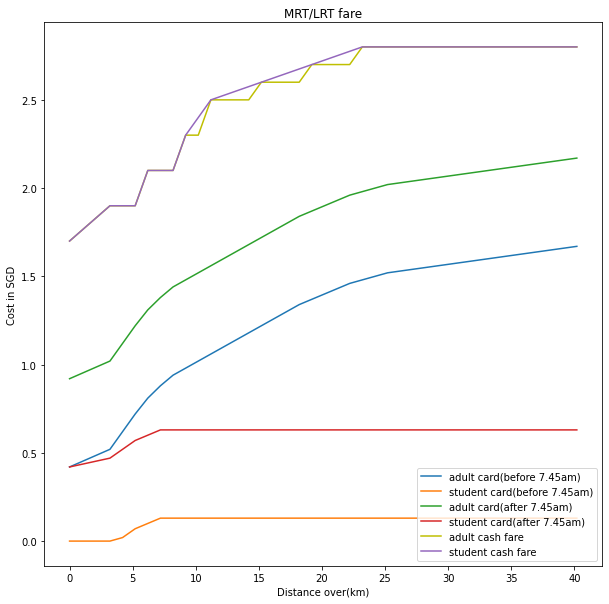

In [9]:
#distance is constant for all the possible y-values
xA = np.array(aDist)
xS = np.array(sDist)

#y values for before 7.45am, card
yA1 = np.array(aPxB47)
yS1 = np.array(sPxB47)

#y values for after 7.45am, card
yA2 = np.array(aPxRail)
yS2 = np.array(sPxAll)

#y values for cash fare
yA3 = np.array(aCPxRail)
yS3 = np.array(sCPxRail)

plt.figure(0)
plt.figure(figsize=(10,10))
plt.plot(xA, yA1, label = "adult card(before 7.45am)")
plt.plot(xS, yS1, label = "student card(before 7.45am)")
plt.plot(xA, yA2, label = "adult card(after 7.45am)")
plt.plot(xS, yS2, label = "student card(after 7.45am)")
plt.plot(xA, yA3, 'y', label = "adult cash fare")
plt.plot(xS, yS3, label = "student cash fare")

plt.xlabel("Distance over(km)")
plt.ylabel("Cost in SGD")
plt.title("MRT/LRT fare")
plt.legend()
plt.show()

<H3>Graph analysis</H3>
<p>Based on the MRT/LRT fare graph and the data from the tables, we can see the following:
    <br>1) Student fare is extremely cheap for those who need to travel distances over 10km in a single trip.
    <br>2) Adult fare gradually becomes cheaper the further you travel.
    <br>3) Travelling before 7.45am reduces travel cost by a large margin for all parties.
    <br>4) Cash fare is especially costly for students.

<Figure size 432x288 with 0 Axes>

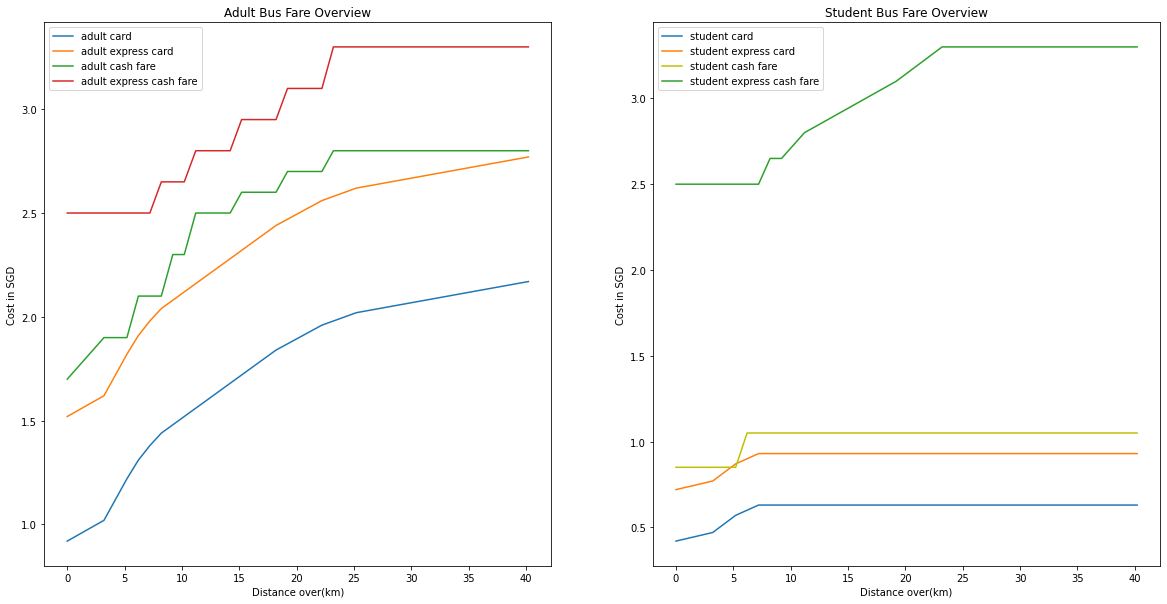

In [10]:
#y values for bus and express card fares
yA4 = np.array(aPxBus)
yA5 = np.array(aPxExp)
yS4 = np.array(sPxAll)
yS5 = np.array(sPxExp)

#y values for bus and express cash fares
yA6 = np.array(aCPxBus)
yA7 = np.array(aCPxExp)
yS6 = np.array(sCPxBus)
yS7 = np.array(sCPxExp)

#drawing bus fare graph
plt.figure(1)
plt.figure(figsize=(20,10))

#creating subplot for Adult Bus Fare
plt.subplot(1,2,1)
plt.plot(xA, yA4, label = "adult card")
plt.plot(xA, yA5, label = "adult express card")
plt.plot(xA, yA6, label = "adult cash fare")
plt.plot(xA, yA7, label = "adult express cash fare")

plt.xlabel("Distance over(km)")
plt.ylabel("Cost in SGD")
plt.title("Adult Bus Fare Overview")
plt.legend()

#creating subplot for Student Bus Fare
plt.subplot(1,2,2)
plt.plot(xS, yS4, label = "student card")
plt.plot(xS, yS5, label = "student express card")
plt.plot(xS, yS6, 'y', label = "student cash fare")
plt.plot(xS, yS7, label = "student express cash fare")

plt.xlabel("Distance over(km)")
plt.ylabel("Cost in SGD")
plt.title("Student Bus Fare Overview")
plt.legend()
plt.show()

<H3>Graph analysis</H3>
<p>Based on the two bus fare graphs and the data from the tables, we can see the following:
    <br>1) Student fare is extremely cheap for those who need to travel long distances on bus.
    <br>2) Adult fare gradually becomes cheaper the further you travel.
    <br>3) Express cash fare for students is significantly more expensive compared to other student fares.
    <br>4) Express cash fare and adult cash fare become much closer in price from 10km to 20km.

<h2>Step 3: Examining fare structure for students</h2>

<p> As observed in the graphs, student fare is considered to always be much cheaper than adult fare over long distances. Furthermore, from the tables, we will observe that for the same distance travelled, MRT/LRT and bus fare is the same for both adult and student fares. This brings in the consideration of other options to that of the fare structure: Monthly Concession Pass(MCP).</p>
<p>If we access the website to transitlink, we will find that MCP prices vary for group i and group ii.
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i) Undergraduate Concession Card, and Private Education Institution Student Concession card
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii) Diploma Student Concession Card, School Smartcard/Non-MOE School Smartcard, and Institute of Technical Education Student Concession Card
    </p>
    <p>Displayed below is the relevant data.</p>

<H3>Group i prices</H3>

In [11]:
url = 'https://www.transitlink.com.sg/undergraduate-concession-card'
uccData = pd.read_html(url)
display(uccData[0])

,Concession Pass,Price
0,Bus Concession Pass (BCP),$55.50
1,Train Concession Pass (TCP),$48.00
2,Hybrid Concession Pass (HCP)*,$90.50


<H3>Group ii prices</H3>

In [12]:
url = 'https://www.transitlink.com.sg/school-smartcard-non-moe-school-smartcard/'
uccData = pd.read_html(url)
display(uccData[0])

,Concession Pass,Primary,Secondary
0,Bus Concession Pass,$24.00,$29.00
1,Train Concession Pass,$21.00,$26.50
2,Hybrid Concession Pass*,$43.50,$54.00


<p><i>Primary in the above refers to Primary school students. Secondary refers to Secondary school students. Prices for Secondary school students are the same for  Diploma Student Concession Card and Institute of Technical Education Student Concession Card holders</i></p>

<H2>Step 4: Hypothesis and evidence based checking</H2>
<p>Given that universities are typically placed on either end of Singapore's rail netwok(e.g. Nearest MRT to NTU is Pioneer/Boon Lay MRT station, to SUTD is Upper Changi MRT station), while Primary and Secondary schools along with Junior Colleges tend to be closer to home, I think that university students are likely to consider the purchase of MCPs as a cheaper option while the others will stick to the fare structure. </p>
<p>In order to prove this, I will first need to calculate the average amount of money spent on travelling per month. For this to be a fair test, I have determined the following factors:
    <br>1) The travel distance used will come in 3 stages: Short distance of 3.2km(estimated to be around 2 stops), medium distance of 18.5km(distance to travel from the west end, Boon Lay MRT station, to central, Orchard MRT), and long distance of 35.5km(distance of one of the longest trips on the MRT map, Pasir Ris to Boon Lay MRT station).
    <br>2) Bus fare and MRT fare will be calculated separately, and compared against the Bus Concession Pass(BCP) and the Train Concession Pass(TCP). Hybrid Concession Pass(HCP) will not be considered, as there is no fair way for the fare to be compared to it.</p>
<p>In a month, there is an average of 30 days. Assuming that in a week of 7 days, 5 days is spent in school, the maximum number of school days in a month will be 4*5+2 = 22. Let the travel fare per trip be money. A round trip to and from school will mean that the total amount spent on travel will be 22*2*money = 44*money.</p>

In [54]:
#to simplify the process, create function to calculate
# fareType = adult or student, transport = mrt, lrt, bus, express, early
def myFareLady(fareType, transport, paidin, distance):
    _type = fareType.upper()
    tport = transport.upper()
    paid = paidin.upper()
    dist = float(distance)
    if(_type == "ADULT"):
        if(tport == "MRT" or tport == "LRT" or tport == "BUS"):
            if(paid == "CARD"):
                for i in aduFare.index:
                    if(aduFare.loc[i,"Distance over(km)"] < dist <= aduFare.loc[i+1,"Distance over(km)"]):
                        return(aduFare.loc[i,"Bus, Card"])
                    
                    elif(dist > aduFare.loc[len(aDist)-1,"Distance over(km)"]):
                        return(aduFare.loc[len(aDist)-1,"Bus, Card"])
            else:
                for i in aduFare.index:
                    if(aduFare.loc[i,"Distance over(km)"] < dist <= aduFare.loc[i+1,"Distance over(km)"]):
                        return(aduFare.loc[i,"Bus, Cash"])
                    elif(dist > aduFare.loc[len(aDist)-1,"Distance over(km)"]):
                        return(aduFare.loc[len(aDist)-1,"Bus, Cash"])
                
        elif(tport == "EXPRESS"):
            if(paid == "CARD"):
                for i in aduFare.index:
                    if(aduFare.loc[i,"Distance over(km)"] < dist <= aduFare.loc[i+1,"Distance over(km)"]):
                        return(aduFare.loc[i,"Express Services, Card"])
                    elif(dist > aduFare.loc[len(aDist)-1,"Distance over(km)"]):
                        return(aduFare.loc[len(aDist)-1,"Express Services, Card"])
            else:
                for i in aduFare.index:
                    if(aduFare.loc[i,"Distance over(km)"] < dist <= aduFare.loc[i+1,"Distance over(km)"]):
                        return(aduFare.loc[i,"Express Services, Cash"])
                    elif(dist > aduFare.loc[len(aDist)-1,"Distance over(km)"]):
                        return(aduFare.loc[len(aDist)-1,"Express Services, Cash"])
            
        else:
            if(paid == "CARD"):
                for i in aduFare.index:
                    if(aduFare.loc[i,"Distance over(km)"] < dist <= aduFare.loc[i+1,"Distance over(km)"]):
                        return(aduFare.loc[i,"MRT/LRT(before 7.45am on weekdays), Card"])
                    elif(dist > aduFare.loc[len(aDist)-1,"Distance over(km)"]):
                        return(aduFare.loc[len(aDist)-1,"MRT/LRT(before 7.45am on weekdays), Card"])
            else:
                print("INVALID")
        
    elif(_type == "STUDENT"):
        if(tport == "MRT" or tport == "LRT" or tport == "BUS"):
            if(paid == "CARD"):
                for i in stuFare.index:
                    if(stuFare.loc[i,"Distance over(km)"] < dist <= stuFare.loc[i+1,"Distance over(km)"]):
                        return(stuFare.loc[i,"LRT/MRT/Bus, Card"])
                    elif(dist > stuFare.loc[len(sDist)-2,"Distance over(km)"]):
                        return(stuFare.loc[len(sDist)-2,"LRT/MRT/Bus, Card"])

            else:
                for i in stuFare.index:
                    if(stuFare.loc[i,"Distance over(km)"] < dist <= stuFare.loc[i+1,"Distance over(km)"]):
                        return(stuFare.loc[i,"Bus, Cash"])
                    elif(dist > stuFare.loc[len(sDist)-2,"Distance over(km)"]):
                        return(stuFare.loc[len(sDist)-2,"Bus, Cash"])
                
        elif(tport == "EXPRESS"):
            if(paid == "CARD"):
                for i in stuFare.index:
                    if(stuFare.loc[i,"Distance over(km)"] < dist <= stuFare.loc[i+1,"Distance over(km)"]):
                        return(stuFare.loc[i,"Express Services, Card"])
                    elif(dist > stuFare.loc[len(sDist)-2,"Distance over(km)"]):
                        return(stuFare.loc[len(sDist)-2,"Express Services, Card"])
            else:
                for i in stuFare.index:
                    if(stuFare.loc[i,"Distance over(km)"] < dist <= stuFare.loc[i+1,"Distance over(km)"]):
                        return(stuFare.loc[i,"Express Services, Cash"])
                    elif(dist > stuFare.loc[len(sDist)-2,"Distance over(km)"]):
                        return(stuFare.loc[len(sDist)-2,"Express Services, Cash"])
            
        else:
            if(paid == "CARD"):
                for i in stuFare.index:
                    if(stuFare.loc[i,"Distance over(km)"] < dist <= stuFare.loc[i+1,"Distance over(km)" ]):
                        return(stuFare.loc[i,"MRT/LRT(before 7.45am on weekdays), Card"])
                    elif(dist > stuFare.loc[len(sDist)-2,"Distance over(km)"]):
                        return(stuFare.loc[len(sDist)-2,"MRT/LRT(before 7.45am on weekdays), Card"])
        
    else:
        print("INVALID")

<H3>Short distance to school</H3>

In [70]:
#bus/mrt/lrt card(since card is cheaper than cash)
shortDStudent = myFareLady("student", "mrt", "card", 3.2)*44
shortDAdult = myFareLady("adult", "mrt", "card", 3.2)*44

#early
eshortDStudent = myFareLady("student", "early", "card", 3.2)*44
eshortDAdult = myFareLady("adult", "early", "card", 3.2)*44

shortDF = pd.DataFrame({'Student MRT/LRT/Bus': [shortDStudent], 'Adult MRT/LRT/Bus': [shortDAdult], 
                        'Student MRT/LRT/Bus before 7.45am': [eshortDStudent], 'Adult MRT/LRT/Bus before 7.45am': [eshortDAdult]})
busSaveS = pd.DataFrame({'Primary Student Savings BCP': [shortDStudent - 24], 'Secondary Student Savings BCP': [shortDStudent - 29], 'Adult Savings BCP': [shortDAdult-55.5], 
                        'Primary Student Savings BCP before 7.45am': [eshortDStudent - 24],
                         'Secondary Student Savings BCP before 7.45am': [eshortDStudent - 29], 'Adult Savings BCP before 7.45am':[ eshortDAdult-55.5]})
trainSaveS = pd.DataFrame({'Primary Student Savings TCP': [shortDStudent-21], 'Secondary Student Savings TCP': [shortDStudent-26.5], 'Adult Savings TCP': [shortDAdult-48], 
                        'Primary Student Savings TCP before 7.45am': [eshortDStudent - 21],
                           'Secondary Student Savings TCP before 7.45am': [eshortDStudent-26.5], 'Adult Savings TCP before 7.45am': [eshortDAdult-48]})

display(shortDF)
display(busSaveS)
display(trainSaveS)

,Student MRT/LRT/Bus,Adult MRT/LRT/Bus,Student MRT/LRT/Bus before 7.45am,Adult MRT/LRT/Bus before 7.45am
0,18.48,40.48,0.0,18.48


,Primary Student Savings BCP,Secondary Student Savings BCP,Adult Savings BCP,Primary Student Savings BCP before 7.45am,Secondary Student Savings BCP before 7.45am,Adult Savings BCP before 7.45am
0,-5.52,-10.52,-15.02,-24.0,-29.0,-37.02


,Primary Student Savings TCP,Secondary Student Savings TCP,Adult Savings TCP,Primary Student Savings TCP before 7.45am,Secondary Student Savings TCP before 7.45am,Adult Savings TCP before 7.45am
0,-2.52,-8.02,-7.52,-21.0,-26.5,-29.52


<H3>Medium distance to school</H3>

In [73]:
#bus/mrt/lrt card(since card is cheaper than cash)
medDStudent = myFareLady("student", "mrt", "card", 18.5)*44
medDAdult = myFareLady("adult", "mrt", "card",18.5)*44

#early
emedDStudent = myFareLady("student", "early", "card", 18.5)*44
emedDAdult = myFareLady("adult", "early", "card", 18.5)*44

medDF = pd.DataFrame({'Student MRT/LRT/Bus': [medDStudent], 'Adult MRT/LRT/Bus': [medDAdult], 
                        'Student MRT/LRT/Bus before 7.45am': [emedDStudent], 'Adult MRT/LRT/Bus before 7.45am': [emedDAdult]})

busSaveM = pd.DataFrame({'Primary Student Savings BCP': [medDStudent - 24],'Secondary Student Savings BCP': [medDStudent - 29], 'Adult Savings BCP': [medDAdult-55.5], 
                        'Primary Student Savings BCP before 7.45am': [emedDStudent - 24], 
                         'Secondary Student Savings BCP before 7.45am': [emedDStudent - 29], 'Adult Savings BCP before 7.45am':[ emedDAdult-55.5]})
trainSaveM = pd.DataFrame({'Primary Student Savings TCP': [medDStudent - 21],'Secondary Student Savings TCP': [medDStudent-26.5], 'Adult Savings TCP': [medDAdult-48], 
                        'Primary Student Savings TCP before 7.45am': [emedDStudent - 21], 
                           'Secondary Student Savings TCP before 7.45am': [emedDStudent-26.5], 'Adult Savings TCP before 7.45am': [emedDAdult-48]})

display(medDF)
display(busSaveM)
display(trainSaveM)

,Student MRT/LRT/Bus,Adult MRT/LRT/Bus,Student MRT/LRT/Bus before 7.45am,Adult MRT/LRT/Bus before 7.45am
0,27.72,80.96,5.72,58.96


,Primary Student Savings BCP,Secondary Student Savings BCP,Adult Savings BCP,Primary Student Savings BCP before 7.45am,Secondary Student Savings BCP before 7.45am,Adult Savings BCP before 7.45am
0,3.72,-1.28,25.46,-18.28,-23.28,3.46


,Primary Student Savings TCP,Secondary Student Savings TCP,Adult Savings TCP,Primary Student Savings TCP before 7.45am,Secondary Student Savings TCP before 7.45am,Adult Savings TCP before 7.45am
0,6.72,1.22,32.96,-15.28,-20.78,10.96


<H3>Long distance to school</H3>

In [75]:
#bus/mrt/lrt card(since card is cheaper than cash)
longDStudent = myFareLady("student", "mrt", "card", 35.5)*44
longDAdult = myFareLady("adult", "mrt", "card",35.5)*44

#early
elongDStudent = myFareLady("student", "early", "card", 35.5)*44
elongDAdult = myFareLady("adult", "early", "card", 35.5)*44

longDF = pd.DataFrame({'Student MRT/LRT/Bus': [longDStudent], 'Adult MRT/LRT/Bus': [longDAdult], 
                        'Student MRT/LRT/Bus before 7.45am': [elongDStudent], 'Adult MRT/LRT/Bus before 7.45am': [elongDAdult]})

busSaveL = pd.DataFrame({'Primary Student Savings BCP': [longDStudent - 24],'Secondary Student Savings BCP': [longDStudent - 29], 'Adult Savings BCP': [longDAdult-55.5], 
                        'Primary Student Savings BCP before 7.45am': [elongDStudent - 24], 
                         'Secondary Student Savings BCP before 7.45am': [elongDStudent - 29], 'Adult Savings BCP before 7.45am':[ elongDAdult-55.5]})
trainSaveL = pd.DataFrame({'Primary Student Savings TCP': [longDStudent - 21],'Secondary Student Savings TCP': [longDStudent-26.5], 'Adult Savings TCP': [longDAdult-48], 
                        'Primary Student Savings TCP before 7.45am': [elongDStudent - 21], 
                           'Secondary Student Savings TCP before 7.45am': [elongDStudent-26.5], 'Adult Savings TCP before 7.45am': [elongDAdult-48]})

display(longDF)
display(busSaveL)
display(trainSaveL)

,Student MRT/LRT/Bus,Adult MRT/LRT/Bus,Student MRT/LRT/Bus before 7.45am,Adult MRT/LRT/Bus before 7.45am
0,27.72,93.28,5.72,71.28


,Primary Student Savings BCP,Secondary Student Savings BCP,Adult Savings BCP,Primary Student Savings BCP before 7.45am,Secondary Student Savings BCP before 7.45am,Adult Savings BCP before 7.45am
0,3.72,-1.28,37.78,-18.28,-23.28,15.78


,Primary Student Savings TCP,Secondary Student Savings TCP,Adult Savings TCP,Primary Student Savings TCP before 7.45am,Secondary Student Savings TCP before 7.45am,Adult Savings TCP before 7.45am
0,6.72,1.22,45.28,-15.28,-20.78,23.28


<H3>Calculating monthly travel expenses</H3>
<p>Based on the data shown above, We can see that the BCP and TCP is helps group i students to save for medium to long distance travel, while for group ii students, the savings are minimal, even costing more sometimes. Thus we can assume that the hypothesis is correct.<p>

<H2>Step 5: Case Study comparison.</H2>
<H3><i>How does theory compare to real life</i></H3>
<H3>Case Study 1: Caleb from Anderson Serangoon Junior College(ASRJC)</H3>
<p> Caleb is a student at ASRJC who commutes to school from his house at Marymount MRT station. If he takes a bus, 851, to school, he travels 3.5km from the bus stop 53121 - Marymount Stn to bus stop 55201 - Aft Blk 648. If he takes a train from Marymount (CC16) to Yio Chu Kang (NS15), he travels 5.4 Km. He takes the MRT every morning at 6.30am to school, and a bus home from school at around 7.30pm. He does not buy a TCP.</p>
<H3>Case Study 1: Theory

In [80]:
#mrt 
display(myFareLady("student", "mrt", "card", 5.4)*44)
#mrt with TCP
display((myFareLady("student", "mrt", "card", 5.4)*44) - 26.5)

#bus
display(myFareLady("student", "bus", "card", 3.5)*44)
#bus with BCP
display(myFareLady("student", "bus", "card", 3.5)*44 - 29)

25.08

-1.4200000000000017

20.68

-8.32

<p>According to the data, it is accurate that Caleb would not buy a TCP as it does not save him money. However, the data shows that travelling by bus to and from school will save him money. However, Caleb does not do so. This deviates from what is expected based off the data. But why?</p>
<h3>Further info on Caleb's Case Study</h3>
<p>Caleb meets his friends at the interchange, Bishan (NS17/CC15) to head to school together. He views the difference in expenditure neglibile and thus chooses to meet his friends instead.</p>
<p>From this, we can derive two factors that causes things to happen outside of what is expected based on the data:
    <br>1) Sense of value: The way people value amounts of money differ. What could be negligible to Caleb might be of concern to another.
    <br>2) Social constructs: Caleb's friendship revolves around this pattern of meeting his friends to head to school together, thus outweighing the cost.

<H3>Case Study 2: Nathanael from SIM University(SIM)</H3>
<p>Nathanael  is a student at SIM who commutes to school from his house at Hougang MRT station. 
If he takes a bus, 151, to school, he travels 20.4km from the bus stop 64009 - Hougang Ctrl Int to bus stop 12099 - Opp SIM HQ. 
If he takes a train from Hougang (NE14) to King Albert Park (DT6), he travels 16.6 Km. He then needs to take a bus from 
bus stop 42051 - King Albert Pk Stn to 12099 - Opp SIM HQ for another 1.6 Km.
He takes the bus 4 days a week to school, and a train home from school. 
He buys a HCP every month.</p>

In [86]:
#mrt 
display(myFareLady("adult", "mrt", "card", 16.6)*44+myFareLady("adult", "bus", "card", 1.6)*44)
#mrt with TCP
display((myFareLady("adult", "mrt", "card", 16.6)*44) - 48-myFareLady("adult", "bus", "card", 1.6)*44)

#bus
display(myFareLady("adult", "bus", "card", 20.4)*44)
#bus with BCP
display(myFareLady("adult", "bus", "card", 20.4)*44 - 55.5)

#current
display(myFareLady("adult", "mrt", "card", 16.6)*22+myFareLady("adult", "bus", "card", 1.6)*22+myFareLady("adult", "bus", "card", 20.4)*22)
#current with HCP
display(myFareLady("adult", "mrt", "card", 16.6)*22+
        myFareLady("adult", "bus", "card", 1.6)*22+myFareLady("adult", "bus", "card", 20.4)*22
       -90.50)

117.92

-11.040000000000006

83.6

28.099999999999994

100.75999999999999

10.259999999999991

<p>According to the data, Nathanael should be buying a BCP as it will save him more money.
He should also take the bus to and from school to save the most money. In both cases, there is a deviation.</p>
<h3>Further info on Nathanael's Case Study</h3>
<p>Nathanael takes approximately 45 mins to get to school if he takes the train before taking the bus, while taking only 151 takes him more than an hour to get to school. Furthermore, Nathanael wants to go home quickly after class.</p>
<p>From this, we can derive two factors that causes things to happen outside of what is expected based on the data:
    <br>1) Time: The cost and distance does not necessarily factor in travel time. 
    <br>2) Environment: On the road, traffic jams and roadworks may slow down the bus.

<H2>Conclusion</H2>
<p>In conclusion, the data has given me insights into how travel cost is affected by the choices made by students. It also showed me that studying data without considering outside factors like time can be detrimental, as the predicted results may not be the same as the actual situation. My study would have been more refined if I was able to collect accurate and unchanging data on the relationship among cost, distance and time. With data on travel time, it would be possible to calculate cost in terms of time, as well as balancing data between time saved and money saved. This could help chart out differences in choice such as choosing to save money or to save time. </p>